In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

# Part 1 Cleaning - Scraping - Transforming

## Scraping table using BeautifulSoup#

In [2]:
#install Beautiful Soup and requests for Web Scaping\n",
!pip install BeautifulSoup4
!pip install requests

from bs4 import BeautifulSoup
import requests
        
#get from wiki page and create soup var
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(source.text, 'lxml')


#using soup object, iterate the .wikitable to get the data from the HTML page and store it into a list
data = []
columns = []
table = soup.find(class_='wikitable')
for index, tr in enumerate(table.find_all('tr')):
    section = []
for td in tr.find_all(['th','td']):
    section.append(td.text.rstrip())
    
    
#First row of data is the header
if (index == 0):
    columns = section
else:
    data.append(section)
print('done')

done


## import ssl and csv and urlopen

In [3]:
from urllib.request import urlopen
import ssl
import csv

print('csv imported.')

csv imported.


## wiki page and define soup variable

In [4]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source, 'lxml')
print('soup ready')

soup ready


## Convert to pandas dataframe

In [5]:
table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')
ata = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]  

print('Top five rows')
print(df.head(5))
print('Bottom five rows')
print(df.tail(5))

Top five rows
  PostalCode       Borough     Neighbourhood
0        M9Z  Not assigned      Not assigned
2        M1A  Not assigned      Not assigned
3        M2A  Not assigned      Not assigned
4        M3A    North York         Parkwoods
5        M4A    North York  Victoria Village
Bottom five rows
    PostalCode       Borough          Neighbourhood
284        M8Z     Etobicoke              Mimico NW
285        M8Z     Etobicoke     The Queensway West
286        M8Z     Etobicoke  Royal York South West
287        M8Z     Etobicoke         South of Bloor
288        M9Z  Not assigned           Not assigned


In [6]:
#determine size
df.shape

(288, 3)

## Process cells that have assigned boroughs, remove not assigned from Boroughs, redef Not Assigned for Neighbourhoods, and combine neighbourhoods with the same postal code

In [184]:
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_text,'lxml')

table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')

data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighbourhood'])
df = df[~df['PostalCode'].isnull()]

#drop not assigned Borough 
df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)

#If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough
df.loc[df['Neighbourhood']=="Not assigned",'Neighbourhood']=df.loc[df['Neighbourhood']=="Not assigned",'Borough']

# more than one neighbourhood in one postal code -> These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df= df.groupby('PostalCode').agg(lambda x: ','.join(x))
df.head()

,Borough,Neighbourhood
PostalCode,,
M1B,"Scarborough,Scarborough","Rouge,Malvern"
M1C,"Scarborough,Scarborough,Scarborough","Highland Creek,Rouge Hill,Port Union"
M1E,"Scarborough,Scarborough,Scarborough","Guildwood,Morningside,West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


## Reindex and see size

In [8]:
df1 = df.reset_index()
df1.shape

(103, 3)

# Part 2 Dataframe with Latitude and Longitude

## Adding address, coorindates, latitude, longitude, 

In [9]:
df1.to_csv('geo.csv')

In [10]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
body = client_ce6a4684c5c74247a3a6b23afaf8eb29.get_object(Bucket='week3ofcapstone-donotdelete-pr-mranwzywnl5qyv',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df_data_1 = pd.read_csv(body)
df_data_1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
df_data_1.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_data_1.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
file = pd.merge(df1, df_data_1, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

file.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,"Scarborough,Scarborough","Rouge,Malvern",43.806686,-79.194353
1,M1C,"Scarborough,Scarborough,Scarborough","Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,"Scarborough,Scarborough,Scarborough","Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [15]:
#checking how Boroughs are listed
print(file['Borough'].unique())

['Scarborough,Scarborough' 'Scarborough,Scarborough,Scarborough'
 'Scarborough' 'Scarborough,Scarborough,Scarborough,Scarborough'
 'North York' 'North York,North York,North York' 'North York,North York'
 'East York,East York' 'East York' 'East Toronto'
 'East Toronto,East Toronto' 'Central Toronto'
 'Central Toronto,Central Toronto'
 'Central Toronto,Central Toronto,Central Toronto,Central Toronto,Central Toronto'
 'Downtown Toronto' 'Downtown Toronto,Downtown Toronto'
 'Downtown Toronto,Downtown Toronto,Downtown Toronto'
 'Central Toronto,Central Toronto,Central Toronto'
 'Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto'
 'York' 'West Toronto,West Toronto'
 'West Toronto,West Toronto,West Toronto' 'York,York,York,York'
 'York,York' "Queen's Park" 'Mississauga' 'Etobicoke,Etobicoke,Etobicoke'
 'Etobicoke,Etobicoke'
 'Etobicoke,Etobicoke,Etobicoke,Etobicoke,Etobicoke,Etobicoke,Etobicoke,Etobicoke'
 'Etobicoke,Etobico

# Clean up the Borough data

In [16]:
#cleaning Borough
file['Borough'] = file['Borough'].apply(lambda x: x.split(',')[0])

In [185]:
file.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [18]:
#making sure Boroughs are cleaned up
print(file['Borough'].unique())

['Scarborough' 'North York' 'East York' 'East Toronto' 'Central Toronto'
 'Downtown Toronto' 'York' 'West Toronto' "Queen's Park" 'Mississauga'
 'Etobicoke']


In [19]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
PostalCode       103 non-null object
Borough          103 non-null object
Neighbourhood    103 non-null object
Latitude         103 non-null float64
Longitude        103 non-null float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


In [20]:
file.to_csv('geoll.csv')

# Part 3: Explore - Cluster - Map!

## Explore and cluster the neighborhoods in Toronto

In [21]:
# load into json
file.to_json(path_or_buf='geo_tdot.json', orient='table')
with open('geo_tdot.json') as json_data:
    geo_tdot = json.load(json_data)
print('done')

done


In [22]:
geo_tdot

{'schema': {'fields': [{'name': 'index', 'type': 'integer'},
   {'name': 'PostalCode', 'type': 'string'},
   {'name': 'Borough', 'type': 'string'},
   {'name': 'Neighbourhood', 'type': 'string'},
   {'name': 'Latitude', 'type': 'number'},
   {'name': 'Longitude', 'type': 'number'}],
  'primaryKey': ['index'],
  'pandas_version': '0.20.0'},
 'data': [{'index': 0,
   'PostalCode': 'M1B',
   'Borough': 'Scarborough',
   'Neighbourhood': 'Rouge,Malvern',
   'Latitude': 43.8066863,
   'Longitude': -79.1943534},
  {'index': 1,
   'PostalCode': 'M1C',
   'Borough': 'Scarborough',
   'Neighbourhood': 'Highland Creek,Rouge Hill,Port Union',
   'Latitude': 43.7845351,
   'Longitude': -79.1604971},
  {'index': 2,
   'PostalCode': 'M1E',
   'Borough': 'Scarborough',
   'Neighbourhood': 'Guildwood,Morningside,West Hill',
   'Latitude': 43.7635726,
   'Longitude': -79.1887115},
  {'index': 3,
   'PostalCode': 'M1G',
   'Borough': 'Scarborough',
   'Neighbourhood': 'Woburn',
   'Latitude': 43.7709921

# Explaining what I've decided to do and reporting observations

### checking size of data, choosing a random field, make sure the data has all boroughs and neighbourhoods

In [23]:
#checking dimension
file.shape

(103, 5)

In [24]:
#Looking at a random item
some_data = geo_tdot['data']
some_data[99]

{'index': 99,
 'PostalCode': 'M9P',
 'Borough': 'Etobicoke',
 'Neighbourhood': 'Westmount',
 'Latitude': 43.696319,
 'Longitude': -79.5322424}

In [25]:
#how many unique boroughs
file['Borough'].nunique()

11

In [26]:
#making sure we have all the 11 boroughs and 103 neighbourhoods
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(file['Borough'].unique()),
        file.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


## generate maps to visualize neighborhoods and how they cluster together

In [27]:
#naming agent Toronto_explorer and finding the lat/long for Toronto
address = 'Toronto, ON'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [28]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(file['Latitude'], file['Longitude'], file['Borough'], file['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# let's just look at Etobicoke

In [31]:
etobicoke = file[file['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M8V,Etobicoke,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321
1,M8W,Etobicoke,"Alderwood,Long Branch",43.602414,-79.543484
2,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North",43.653654,-79.506944
3,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout...",43.636258,-79.498509
4,M8Z,Etobicoke,"Kingsway Park South West,Mimico NW,The Queensw...",43.628841,-79.520999
5,M9B,Etobicoke,"Cloverdale,Islington,Martin Grove,Princess Gar...",43.650943,-79.554724
6,M9C,Etobicoke,"Bloordale Gardens,Eringate,Markland Wood,Old B...",43.643515,-79.577201
7,M9P,Etobicoke,Westmount,43.696319,-79.532242
8,M9R,Etobicoke,"Kingsview Village,Martin Grove Gardens,Richvie...",43.688905,-79.554724
9,M9V,Etobicoke,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",43.739416,-79.588437


In [32]:
# getting the geolocation for Etobicoke
address = 'Etobicoke'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Etobicoke are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Etobicoke are 43.67145915, -79.5524920661167.


In [33]:
# create map of Etobicoke using latitude and longitude values
map_etobicoke = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(etobicoke['Latitude'], etobicoke['Longitude'], etobicoke['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_etobicoke)  
    
map_etobicoke

## Here's the same for Scarborough (Mapping Neighbourhoods)

In [186]:
scarborough = file[file['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [40]:
# getting the geolocation for Scarborough
address = 'Scarborough, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


In [41]:
# create map of Scarborough using latitude and longitude values
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(scarborough['Latitude'], scarborough['Longitude'], scarborough['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

# *BATTLE OF THE BOROUGHS*
## Using Foursquare

In [37]:
# The code was removed by Watson Studio for sharing.

My foursquare credentails entered


## Latitude and Longitude of Etobicoke and Scarborough

In [42]:
etobicoke_latitude = 43.6715
#file.loc[102, 'Latitude'] # borough latitude value
etobicoke_longitude = -79.553
#file.loc[102, 'Longitude'] # borough longitude value

#etobicoke_name = file.loc[102, 'Borough'] # borough name

#print('Latitude and longitude values of {} are {}, {}.'.format(etobicoke_name, 
 #                                                              etobicoke_latitude, 
  #                                                             etobicoke_longitude))

In [88]:
scarborough_latitude = file.loc[1, 'Latitude'] # borough latitude value
scarborough_longitude = file.loc[1, 'Longitude'] # borough longitude value

scarborough_name = file.loc[1, 'Borough'] # borough name

print('Latitude and longitude values of {} are {}, {}.'.format(scarborough_name, 
                                                               scarborough_latitude, 
                                                               scarborough_longitude))

Latitude and longitude values of Scarborough are 43.7845351, -79.16049709999999.


## top 10 venues in Etobicoke and top 10 venues in Scarborough

In [67]:
# Foursquare
LIMIT = 100
radius = 3000 #this may cause an overlap when retrieving venues in each neighbourhood but it will be taken into consideration during the analysis
urle = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    etobicoke_latitude, 
    etobicoke_longitude, 
    radius, 
    LIMIT)
urle 

'https://api.foursquare.com/v2/venues/explore?&client_id=VEQIS1TMJHA0BKFAYVXZ2D3XYY4UANYS0DBXXZG3TVKMZ5IK&client_secret=AGBKK0CU0IYRWYWXIBLKPPPNJRWUDKHAMPTLYWSZZURMHMXW&v=20180605&ll=43.6715,-79.553&radius=3000&limit=100'

In [68]:
results = requests.get(urle).json()

In [69]:
LIMIT = 100
radius = 3000
urls = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    scarborough_latitude, 
    scarborough_longitude, 
    radius, 
    LIMIT)
urls 

'https://api.foursquare.com/v2/venues/explore?&client_id=VEQIS1TMJHA0BKFAYVXZ2D3XYY4UANYS0DBXXZG3TVKMZ5IK&client_secret=AGBKK0CU0IYRWYWXIBLKPPPNJRWUDKHAMPTLYWSZZURMHMXW&v=20180605&ll=43.7845351,-79.16049709999999&radius=3000&limit=100'

In [70]:
results_Sb = requests.get(urls).json()

In [71]:
# creating my get function
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
print('done')

done


In [187]:
#Having a general  look at Etobicoke venues

venues_eb = results['response']['groups'][0]['items']
    
nearby_venues_eb = json_normalize(venues_eb) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_eb =nearby_venues_eb.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_eb['venue.categories'] = nearby_venues_eb.apply(get_category_type, axis=1)

# clean columns
nearby_venues_eb.columns = [col.split(".")[-1] for col in nearby_venues_eb.columns]

nearby_venues_eb.head()

,name,categories,lat,lng
0,Metro,Supermarket,43.675011,-79.556234
1,St Georges Golf and Country Club,Golf Course,43.674395,-79.537142
2,Java Joe's Village Cafe,Café,43.662461,-79.532054
3,Mrakovic,Eastern European Restaurant,43.666641,-79.578850
4,West Deane Park,Park,43.662357,-79.558618


In [78]:
#getting an idea on hotels
e_hotels = nearby_venues_eb[nearby_venues_eb['categories'] == 'Hotel'].reset_index(drop=True)
e_hotels.head(10)

,name,categories,lat,lng
0,Delta Hotels by Marriott Toronto Airport & Con...,Hotel,43.688993,-79.577907


In [79]:
#getting an idea around etobicoke coffee shops
e_cshops = nearby_venues_eb[nearby_venues_eb['categories'] == 'Coffee Shop'].reset_index(drop=True)
e_cshops.head(10)

,name,categories,lat,lng
0,Second Cup,Coffee Shop,43.679475,-79.544773
1,Tim Hortons,Coffee Shop,43.674980,-79.557725
2,Tim Hortons,Coffee Shop,43.691192,-79.576587
3,Starbucks,Coffee Shop,43.689422,-79.578078
4,Tim Hortons,Coffee Shop,43.696170,-79.544922


In [89]:
#Getting an idea around Scarborough venues now
venues_sb = results_Sb['response']['groups'][0]['items']
    
nearby_venues_sb = json_normalize(venues_sb) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_sb =nearby_venues_sb.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_sb['venue.categories'] = nearby_venues_sb.apply(get_category_type, axis=1)

# clean columns
nearby_venues_sb.columns = [col.split(".")[-1] for col in nearby_venues_sb.columns]

nearby_venues_sb.head(10)

,name,categories,lat,lng
0,"Lamanna's Bakery, Cafe & Fine Foods",Bakery,43.797971,-79.148432
1,Fratelli Village Pizzeria,Italian Restaurant,43.784008,-79.169787
2,Shamrock Burgers,Burger Joint,43.783823,-79.168406
3,Ted's Restaurant,Breakfast Spot,43.784468,-79.169200
4,Port Union Waterfront Park,Park,43.774967,-79.134393
5,Toronto Pan Am Sports Centre,Athletics & Sports,43.790623,-79.193869
6,Glen Rouge Campground,Campground,43.803167,-79.155183
7,Coppa's Fresh Market,Grocery Store,43.772094,-79.166340
8,LCBO,Liquor Store,43.771462,-79.184384
9,Shoppers Drug Mart,Pharmacy,43.797641,-79.150208


In [90]:
print('{} venues in Etobicoke were returned by Foursquare.'.format(nearby_venues_eb.shape[0]))
print('{} venues in Scarborough were returned by Foursquare.'.format(nearby_venues_sb.shape[0]))

66 venues in Etobicoke were returned by Foursquare.
77 venues in Scarborough were returned by Foursquare.


# After a brief exploration of both Boroughs - we will now explore the neighborhoods in each

In [91]:
#let's list the neighbourhoods in Scarborough
scarborough_data = file[file['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [92]:
print(scarborough_data['Neighbourhood'].unique())

['Rouge,Malvern' 'Highland Creek,Rouge Hill,Port Union'
 'Guildwood,Morningside,West Hill' 'Woburn' 'Cedarbrae'
 'Scarborough Village' 'East Birchmount Park,Ionview,Kennedy Park'
 'Clairlea,Golden Mile,Oakridge'
 'Cliffcrest,Cliffside,Scarborough Village West'
 'Birch Cliff,Cliffside West'
 'Dorset Park,Scarborough Town Centre,Wexford Heights' 'Maryvale,Wexford'
 'Agincourt' "Clarks Corners,Sullivan,Tam O'Shanter"
 "Agincourt North,L'Amoreaux East,Milliken,Steeles East" "L'Amoreaux West"
 'Upper Rouge']


In [93]:
scarborough_data['Neighbourhood'].nunique()

17

In [188]:
#let's list the neighbourhoods in Etobicoke
etobicoke_data = file[file['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M8V,Etobicoke,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321
1,M8W,Etobicoke,"Alderwood,Long Branch",43.602414,-79.543484
2,M8X,Etobicoke,"The Kingsway,Montgomery Road,Old Mill North",43.653654,-79.506944
3,M8Y,Etobicoke,"Humber Bay,King's Mill Park,Kingsway Park Sout...",43.636258,-79.498509
4,M8Z,Etobicoke,"Kingsway Park South West,Mimico NW,The Queensw...",43.628841,-79.520999


In [86]:
#checking out the neighbourhoods in Etobicoke
print(etobicoke_data['Neighbourhood'].unique())

['Humber Bay Shores,Mimico South,New Toronto' 'Alderwood,Long Branch'
 'The Kingsway,Montgomery Road,Old Mill North'
 "Humber Bay,King's Mill Park,Kingsway Park South East,Mimico NE,Old Mill South,The Queensway East,Royal York South East,Sunnylea"
 'Kingsway Park South West,Mimico NW,The Queensway West,Royal York South West,South of Bloor'
 'Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park'
 'Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe' 'Westmount'
 'Kingsview Village,Martin Grove Gardens,Richview Gardens,St. Phillips'
 'Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown'
 'Northwest']


In [303]:
#how many were there again?
etobicoke_data['Neighbourhood'].nunique()

11

In [110]:
# Creating the below function to repeat the process for all neighbourhoods in Scarborough and Etobicoke

def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category', 'Venue_ID']

    
    return(nearby_venues)

# *Scarborough*

In [111]:
scarborough_venues = getNearbyVenues(names=scarborough_data['Neighbourhood'],
                                   latitudes=scarborough_data['Latitude'],
                                   longitudes=scarborough_data['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West
Upper Rouge


In [112]:
print(scarborough_venues.shape)

(1476, 8)


In [113]:
scarborough_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
0,"Rouge,Malvern",43.806686,-79.194353,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit,4cd854fd3ec4b1f71900be3f
1,"Rouge,Malvern",43.806686,-79.194353,Toronto Pan Am Sports Centre,43.790623,-79.193869,Athletics & Sports,542858a0498e22b7cfa91070
2,"Rouge,Malvern",43.806686,-79.194353,Toronto Zoo,43.820582,-79.181551,Zoo,4ad4c05ef964a52093f620e3
3,"Rouge,Malvern",43.806686,-79.194353,Polar Bear Exhibit,43.823372,-79.185145,Zoo,4bf590095e800f47b1b8e5d4
4,"Rouge,Malvern",43.806686,-79.194353,Penguin Exhibit,43.819435,-79.185959,Zoo Exhibit,4f538e74e4b0ef9672a71ac9


In [114]:
# check how many venues were returned for each neighbourhood
scarborough_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
Neighbourhood,,,,,,,
Agincourt,100,100,100,100,100,100,100
"Agincourt North,L'Amoreaux East,Milliken,Steeles East",100,100,100,100,100,100,100
"Birch Cliff,Cliffside West",84,84,84,84,84,84,84
Cedarbrae,100,100,100,100,100,100,100
"Clairlea,Golden Mile,Oakridge",100,100,100,100,100,100,100
"Clarks Corners,Sullivan,Tam O'Shanter",100,100,100,100,100,100,100
"Cliffcrest,Cliffside,Scarborough Village West",44,44,44,44,44,44,44
"Dorset Park,Scarborough Town Centre,Wexford Heights",100,100,100,100,100,100,100
"East Birchmount Park,Ionview,Kennedy Park",100,100,100,100,100,100,100


In [115]:
#To analyze each nbhd
# hot dummies -- or more formally one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

In [116]:
# add neighborhood column back to dataframe
scarborough_onehot['Neighbourhood'] = scarborough_venues['Neighbourhood'] 

In [117]:
# move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])

In [118]:
scarborough_onehot = scarborough_onehot[fixed_columns]
scarborough_onehot.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Store,Bistro,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop,Curling Ice,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Hardware Store,Health Food Store,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laser Tag,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Music Store,National Park,Neighborhood,Noodle House,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Rouge,Malvern",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,"Rouge,Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [119]:
# checking the size 
scarborough_onehot.shape

(1476, 153)

In [189]:
# grouping by neighbourhood
scarborough_grouped = scarborough_onehot.groupby('Neighbourhood').mean().reset_index()
scarborough_grouped.head()

,Neighbourhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Beer Store,Bistro,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Campground,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Stadium,Convenience Store,Cosmetics Shop,Cupcake Shop,Curling Ice,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Hardware Store,Health Food Store,Hobby Shop,Hockey Arena,Hong Kong Restaurant,Hookah Bar,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Laser Tag,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Music Store,National Park,Neighborhood,Noodle House,Optical Shop,Other Great Outdoors,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pool Hall,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Rock Climbing Spot,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skating Rink,Smoothie Shop,Snack Place,Spa,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Agincourt,0.01,0.01,0.01,0.00,0.0,0.00,0.0,0.000000,0.030000,0.00000,0.010000,0.0,0.00000,0.00000,0.0,0.03,0.02000,0.00,0.03,0.000000,0.00,0.0,0.0,0.000000,0.0,0.02,0.040000,0.09,0.01,0.03,0.050000,0.0,0.00,0.01,0.000000,0.00,0.00,0.00,0.00,0.02,0.0,0.01000,0.010000,0.00,0.01,0.00,0.00,0.0,0.0,0.03000,0.010000,0.01000,0.0,0.00,0.000000,0.00,0.000000,0.01,0.01000,0.000000,0.000000,0.0,0.000000,0.01,0.000000,0.010000,0.020000,0.0,0.0,0.01,0.000000,0.00,0.0,0.00,0.00,0.0,0.01,0.0,0.010000,0.050000,0.000000,0.0,0.01,0.000000,0.01,0.01,0.00,0.00,0.01,0.0,0.01000,0.00,0.00,0.01,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.000000,0.000000,0.00,0.04000,0.010000,0.0,0.01,0.0,0.01,0.000000,0.000000,0.04000,0.00,0.010000,0.01,0.01,0.00,0.000000,0.0,0.00,0.0,0.02,0.00,0.01,0.02,0.0,0.03,0.02000,0.0,0.00,0.00,0.01,0.0,0.010000,0.0,0.0,0.01,0.000000,0.00000,0.0,0.00,0.00,0.00,0.000000,0.01,0.00,0.01,0.00,0.00,0.0,0.0
1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",0.00,0.00,0.02,0.00,0.0,0.00,0.0,0.000000,0.050000,0.01000,0.000000,0.0,0.00000,0.00000,0.0,0.00,0.00000,0.00,0.05,0.000000,0.00,0.0,0.0,0.000000,0.0,0.00,0.010000,0.17,0.00,0.00,0.060000,0.0,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.03,0.0,0.00000,0.020000,0.00,0.02,0.00,0.01,0.0,0.0,0.01000,0.000000,0.00000,0.0,0.01,0.000000,0.00,0.010000,0.00,0.02000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.010000,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.03,0.0,0.00,0.0,0.010000,0.020000,0.000000,0.0,0.00,0.040000,0.01,0.02,0.00,0.00,0.01,0.0,0.00000,0.00,0.01,0.00,0.0,0.00,0.0,0.0,0.03,0.01,0.0,0.000000,0.010000,0.00,0.03000,0.030000,0.0,0.01,0.0,0.00,0.000000,0.000000,0.01000,0.00,0.030000,0.00,0.01,0.00,0.000000,0.0,0.01,0.0,0.00,0.00,0.00,0.01,0.0,0.02,0.02000,0.0,0.01,0.01,0.02,0.0,0.000000,0.0,

In [121]:
# grouped size 
scarborough_grouped.shape

(17, 153)

In [122]:
#Print each neighbourhood with the top 15 common venues - to scroll through and get an idea:
num_top_venues = 15
for hood in scarborough_grouped['Neighbourhood']:
        print("----"+hood+"----")
        temp = scarborough_grouped[scarborough_grouped['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

----Agincourt----
                   venue  freq
0     Chinese Restaurant  0.09
1            Coffee Shop  0.05
2      Indian Restaurant  0.05
3             Restaurant  0.04
4   Caribbean Restaurant  0.04
5               Pharmacy  0.04
6         Clothing Store  0.03
7        Bubble Tea Shop  0.03
8                 Bakery  0.03
9            Supermarket  0.03
10  Fast Food Restaurant  0.03
11             Bookstore  0.03
12        Breakfast Spot  0.02
13          Dessert Shop  0.02
14            Steakhouse  0.02


----Agincourt North,L'Amoreaux East,Milliken,Steeles East----
                    venue  freq
0      Chinese Restaurant  0.17
1             Coffee Shop  0.06
2                  Bakery  0.05
3         Bubble Tea Shop  0.05
4     Japanese Restaurant  0.04
5   Vietnamese Restaurant  0.04
6            Dessert Shop  0.03
7                Pharmacy  0.03
8    Hong Kong Restaurant  0.03
9            Noodle House  0.03
10         Sandwich Place  0.03
11            Pizza Place  0.03
12    

In [123]:
#create pandas dataframe and sorting by descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [124]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_sb_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_sb_venues_sorted['Neighbourhood'] = scarborough_grouped['Neighbourhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighbourhoods_sb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

#check top 5
neighbourhoods_sb_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Indian Restaurant,Caribbean Restaurant,Restaurant,Pharmacy,Bakery,Clothing Store,Bubble Tea Shop,Supermarket,Bookstore,Fast Food Restaurant,Steakhouse,Sporting Goods Shop,Sushi Restaurant
1,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Chinese Restaurant,Coffee Shop,Bakery,Bubble Tea Shop,Vietnamese Restaurant,Japanese Restaurant,Pizza Place,Dessert Shop,Hong Kong Restaurant,Noodle House,Sandwich Place,Pharmacy,Gas Station,Tea Room,Korean Restaurant
2,"Birch Cliff,Cliffside West",Coffee Shop,Pub,Park,Sandwich Place,Pizza Place,Ice Cream Shop,Grocery Store,Burger Joint,Train Station,Breakfast Spot,Gas Station,Beer Store,Restaurant,Beach,Sushi Restaurant
3,Cedarbrae,Coffee Shop,Gas Station,Indian Restaurant,Clothing Store,Caribbean Restaurant,Bakery,Gym,Chinese Restaurant,Restaurant,Sporting Goods Shop,Pharmacy,Breakfast Spot,Bank,Sandwich Place,Pizza Place
4,"Clairlea,Golden Mile,Oakridge",Coffee Shop,Bank,Chinese Restaurant,Middle Eastern Restaurant,Park,Sandwich Place,Grocery Store,Gym / Fitness Center,Clothing Store,Burger Joint,Fast Food Restaurant,Supermarket,Burrito Place,Department Store,Japanese Restaurant


In [125]:
#return only neighbourhoods with Hotels
s_hotels = scarborough_venues[scarborough_venues['Venue Category']=='Hotel'].reset_index(drop=True)
s_hotels.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
0,"Guildwood,Morningside,West Hill",43.763573,-79.188711,The Guild Inn,43.748229,-79.192334,Hotel,4b0b873df964a520183223e3
1,Woburn,43.770992,-79.216917,Best Western Plus Executive Inn,43.783657,-79.237512,Hotel,4c5a19e22091a59356bc5ed0
2,Cedarbrae,43.773136,-79.239476,Best Western Plus Executive Inn,43.783657,-79.237512,Hotel,4c5a19e22091a59356bc5ed0
3,Scarborough Village,43.744734,-79.239476,Comfort Inn,43.733799,-79.222927,Hotel,4cc8b7d041e7548153535884
4,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476,Comfort Inn,43.733799,-79.222927,Hotel,4cc8b7d041e7548153535884


In [190]:
#return only neighbourhoods with Convenience Store, hotel, coffee shop, pharmacy -since in Canada pharmacies generally have 
#some daily needs like a convenience store would
array = ['Hotel', 'Coffee Shop', 'Pharmacy', 'Motel', 'Convenience Store', 'Deli', 'Grocery Store', 'Cafe']
jacks_s_venues=scarborough_venues.loc[scarborough_venues['Venue Category'].isin(array)]
jacks_s_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
17,"Rouge,Malvern",43.806686,-79.194353,Shoppers Drug Mart,43.809610,-79.222729,Pharmacy,545ecf75498ec51130da75e0
24,"Rouge,Malvern",43.806686,-79.194353,Starbucks,43.783821,-79.187490,Coffee Shop,540880cb498eb86517fc02ee
33,"Rouge,Malvern",43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop,4b16e23bf964a520edbe23e3
43,"Rouge,Malvern",43.806686,-79.194353,Shoppers Drug Mart,43.806489,-79.223024,Pharmacy,4c23612211de20a10c4986ce
49,"Rouge,Malvern",43.806686,-79.194353,Francois' No Frills,43.808416,-79.223520,Grocery Store,4be41ebf5254d13a956460e1


In [164]:
# Count drugstores in each neighbourhood
#df.drop('column_name', axis=1, inplace=True)
#jacks_s_grouped = jacks_s_venues.groupby(['Neighbourhood', 'Venue Category']).size()
#jacks_s_grouped.reset_index()

jacks_s_venues.groupby( [ "Neighbourhood", "Venue Category"] ).size().to_frame(name = 'count').reset_index()

,Neighbourhood,Venue Category,count
0,Agincourt,Coffee Shop,5
1,Agincourt,Hotel,1
2,Agincourt,Pharmacy,4
3,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Coffee Shop,6
4,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Pharmacy,3
5,"Birch Cliff,Cliffside West",Coffee Shop,7
6,"Birch Cliff,Cliffside West",Grocery Store,3
7,"Birch Cliff,Cliffside West",Pharmacy,2
8,Cedarbrae,Coffee Shop,11
9,Cedarbrae,Grocery Store,1


In [165]:
#let's get rid of the columns we don't really need and just keep nbhd and venue type
jacks_s_venues.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue'], axis=1, inplace=True)

In [191]:
jacks_s_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
17,"Rouge,Malvern",43.806686,-79.194353,Shoppers Drug Mart,43.809610,-79.222729,Pharmacy,545ecf75498ec51130da75e0
24,"Rouge,Malvern",43.806686,-79.194353,Starbucks,43.783821,-79.187490,Coffee Shop,540880cb498eb86517fc02ee
33,"Rouge,Malvern",43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop,4b16e23bf964a520edbe23e3
43,"Rouge,Malvern",43.806686,-79.194353,Shoppers Drug Mart,43.806489,-79.223024,Pharmacy,4c23612211de20a10c4986ce
49,"Rouge,Malvern",43.806686,-79.194353,Francois' No Frills,43.808416,-79.223520,Grocery Store,4be41ebf5254d13a956460e1


In [130]:
#making sure the new dataframe has the column names so we can work with them later
jacks_s_venues.columns

Index(['Neighbourhood', 'Venue Category', 'Venue_ID'], dtype='object')

In [131]:
neighs = ["Cliffcrest,Cliffside,Scarborough Village West", "Agincourt", "Clarks Corners,Sullivan,Tam O'Shanter", "Scarborough Village", "Cedarbrae", "Woburn", "Guildwood,Morningside,West Hill"]
#"Agincourt North,L'Amoreaux East,Milliken,Steeles East", "L'Amoreaux West"
jacks_grouped1 = jacks_s_venues.loc[jacks_s_venues['Neighbourhood'].isin(neighs)]
jacks_grouped1

,Neighbourhood,Venue Category,Venue_ID
161,"Guildwood,Morningside,West Hill",Coffee Shop,52c9c825498e19d4d5393e77
162,"Guildwood,Morningside,West Hill",Grocery Store,4b46755ff964a520ac2126e3
168,"Guildwood,Morningside,West Hill",Pharmacy,4b75e7bbf964a520992d2ee3
169,"Guildwood,Morningside,West Hill",Grocery Store,4b57b562f964a520133d28e3
170,"Guildwood,Morningside,West Hill",Coffee Shop,4b06eb1cf964a52005f322e3
174,"Guildwood,Morningside,West Hill",Coffee Shop,540880cb498eb86517fc02ee
176,"Guildwood,Morningside,West Hill",Coffee Shop,4cc1d28c06c254815ac18547
178,"Guildwood,Morningside,West Hill",Pharmacy,4fb699d97bebbeb2a6c7b82e
187,"Guildwood,Morningside,West Hill",Coffee Shop,5224a1b111d28e35e5688908
191,"Guildwood,Morningside,West Hill",Pharmacy,4c23737b502b952193346e21


In [132]:
#now let's group them using the column names we confirmed above
jacks_sc=jacks_grouped1.groupby( [ "Neighbourhood", "Venue Category"] ).size().to_frame(name = 'count').reset_index()

In [133]:
#finding the neighbourhoods with all three venue categories
jacks_s=jacks_grouped1.groupby('Neighbourhood').count() > 2
jacks_s

,Venue Category,Venue_ID
Neighbourhood,,
Agincourt,True,True
Cedarbrae,True,True
"Clarks Corners,Sullivan,Tam O'Shanter",True,True
"Cliffcrest,Cliffside,Scarborough Village West",True,True
"Guildwood,Morningside,West Hill",True,True
Scarborough Village,True,True
Woburn,True,True


In [134]:
jacks=jacks_s[jacks_s]

In [135]:
jacks_sc

,Neighbourhood,Venue Category,count
0,Agincourt,Coffee Shop,5
1,Agincourt,Hotel,1
2,Agincourt,Pharmacy,4
3,Cedarbrae,Coffee Shop,11
4,Cedarbrae,Grocery Store,1
5,Cedarbrae,Hotel,1
6,Cedarbrae,Pharmacy,3
7,"Clarks Corners,Sullivan,Tam O'Shanter",Coffee Shop,5
8,"Clarks Corners,Sullivan,Tam O'Shanter",Grocery Store,1
9,"Clarks Corners,Sullivan,Tam O'Shanter",Hotel,2


# Bar Chart for the neighbourhoods in Scarborough that have the three venues to give us a visual representation of the data

<Figure size 432x360 with 0 Axes>

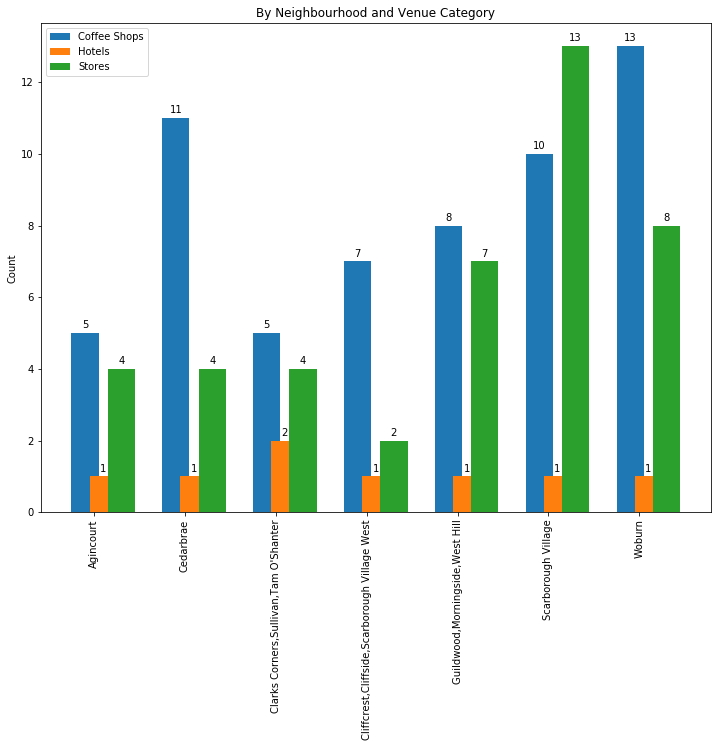

In [167]:
# let's plot on a semi decent bar chart these 5 neighbourhoods with a bar for each coffee shop / drugstore / hotel in horizontal access

import matplotlib
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(6,5))


labels = ["Agincourt", "Cedarbrae", "Clarks Corners,Sullivan,Tam O'Shanter", "Cliffcrest,Cliffside,Scarborough Village West", "Guildwood,Morningside,West Hill", "Scarborough Village", "Woburn"]
CoffeeShops = [5, 11, 5, 7, 8, 10, 13]
Hotels = [1, 1, 2, 1, 1, 1, 1]
Stores = [4, 4, 4, 2, 7, 13, 8]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/3, CoffeeShops, width, label='Coffee Shops')
rects2 = ax.bar(x + width/3, Hotels, width, label='Hotels')
rects3 = ax.bar(x + width, Stores, width, label='Stores')


# Adding labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('By Neighbourhood and Venue Category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
        
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)



plt.show()

In [139]:
# Confirming size - considering changing
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


# *Now Etobicoke

In [142]:
etobicoke_venues = getNearbyVenues(names=etobicoke_data['Neighbourhood'],
                                   latitudes=etobicoke_data['Latitude'],
                                   longitudes=etobicoke_data['Longitude']
                                  )

Humber Bay Shores,Mimico South,New Toronto
Alderwood,Long Branch
The Kingsway,Montgomery Road,Old Mill North
Humber Bay,King's Mill Park,Kingsway Park South East,Mimico NE,Old Mill South,The Queensway East,Royal York South East,Sunnylea
Kingsway Park South West,Mimico NW,The Queensway West,Royal York South West,South of Bloor
Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park
Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe
Westmount
Kingsview Village,Martin Grove Gardens,Richview Gardens,St. Phillips
Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown
Northwest


In [143]:
print(etobicoke_venues.shape)

(1024, 8)


In [347]:
etobicoke_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
0,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Huevos Gourmet,43.601188,-79.503717,Mexican Restaurant,5395d784498e085ff3c18198
1,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,LCBO,43.602281,-79.499302,Liquor Store,4b119977f964a520488023e3
2,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,SanRemo Bakery,43.618542,-79.499485,Bakery,4ba3fa87f964a520d17338e3
3,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Birds and Beans Cafe,43.613942,-79.489062,Café,4b912dfef964a52077a833e3
4,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Sweet Olenka's,43.601099,-79.500325,Dessert Shop,4c081867ffb8c9b6d7b66761


In [144]:
etobicoke_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
Neighbourhood,,,,,,,
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",81,81,81,81,81,81,81
"Alderwood,Long Branch",100,100,100,100,100,100,100
"Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe",100,100,100,100,100,100,100
"Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park",69,69,69,69,69,69,69
"Humber Bay Shores,Mimico South,New Toronto",100,100,100,100,100,100,100
"Humber Bay,King's Mill Park,Kingsway Park South East,Mimico NE,Old Mill South,The Queensway East,Royal York South East,Sunnylea",100,100,100,100,100,100,100
"Kingsview Village,Martin Grove Gardens,Richview Gardens,St. Phillips",100,100,100,100,100,100,100
"Kingsway Park South West,Mimico NW,The Queensway West,Royal York South West,South of Bloor",88,88,88,88,88,88,88
Northwest,100,100,100,100,100,100,100


In [145]:
#hot dummies again
etobicoke_onehot=pd.get_dummies(etobicoke_venues[['Venue Category']], prefix="", prefix_sep="")

In [146]:
#adding nbhd to df
etobicoke_onehot['Neighbourhood'] = etobicoke_venues['Neighbourhood']

In [147]:
#now move nbhd column to first column
fixed_columns1 = [etobicoke_onehot.columns[-1]] + list(etobicoke_onehot.columns[:-1])

In [148]:
#checking it out
etobicoke_onehot = etobicoke_onehot[fixed_columns1]
etobicoke_onehot.head()

,Neighbourhood,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Laundromat,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music Venue,Nightclub,Organic Grocery,Paintball Field,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoothie Shop,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Humber Bay Shores,Mimico South,New Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Humber Bay Shores,Mimico South,New Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Humber Bay Shores,Mimico South,New Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Humber Bay Shores,Mimico South,New Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Humber Bay Shores,Mimico South,New Toronto",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
#check size
etobicoke_onehot.shape

(1024, 135)

In [150]:
# group by nbhd
etobicoke_grouped = etobicoke_onehot.groupby('Neighbourhood').mean().reset_index()
etobicoke_grouped

,Neighbourhood,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hobby Shop,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Laundromat,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Music Venue,Nightclub,Organic Grocery,Paintball Field,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Portuguese Restaurant,Pub,Racecourse,Racetrack,Record Shop,Rental Car Location,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Ski Chalet,Smoothie Shop,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",0.000000,0.00,0.00,0.000000,0.00,0.000000,0.012346,0.049383,0.000000,0.000000,0.012346,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.024691,0.012346,0.024691,0.00,0.00,0.000000,0.012346,0.00,0.160494,0.012346,0.000000,0.000000,0.00,0.00,0.00,0.00,0.024691,0.000000,0.000000,0.024691,0.000000,0.000000,0.00,0.000000,0.086420,0.000000,0.012346,0.000000,0.00,0.000000,0.00,0.000000,0.012346,0.00,0.000000,0.012346,0.049383,0.000000,0.000000,0.00,0.000000,0.00,0.012346,0.061728,0.012346,0.00,0.012346,0.00,0.000000,0.000000,0.000000,0.061728,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.012346,0.012346,0.000000,0.000000,0.012346,0.00,0.00,0.00,0.012346,0.000000,0.000000,0.037037,0.049383,0.000000,0.000000,0.000000,0.000000,0.012346,0.012346,0.00,0.00,0.012346,0.000000,0.049383,0.00,0.000000,0.00,0.000000,0.012346,0.000000,0.012346,0.00,0.000000,0.00,0.012346,0.012346,0.012346,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.012346,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,"Alderwood,Long Branch",0.010000,0.01,0.01,0.010000,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.01,0.00,0.020000,0.010000,0.00,0.00,0.050000,0.030000,0.020000,0.000000,0.000000,0.010000,0.01,0.01,0.010000,0.020000,0.01,0.060000,0.000000,0.000000,0.000000,0.01,0.00,0.01,0.00,0.020000,0.000000,0.010000,0.010000,0.000000,0.010000,0.00,0.000000,0.030000,0.000000,0.000000,0.000000,0.00,0.000000,0.01,0.000000,0.000000,0.00,0.030000,0.000000,0.010000,0.000000,0.000000,0.01,0.000000,0.01,0.020000,0.030000,0.020000,0.00,0.010000,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.010000,0.01,0.00,0.000000,0.010000,0.000000,0.010000,0.030000,0.000000,0.000000,0.00,0.01,0.00,0.000000,0.020000,0.010000,0.010000,0.020000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.00,0.00,0.000000,0.020000,0.010000,0.00,0.030000,0.00,0.010000,0.010000,0.000000,0.000000,0.01,0.000000,0.00,0.010000,0.010000,0.000000,0.010000,0.00,0.000000,0.01,0.010000,0.010000,0.000000,0

In [151]:
#size of grouped
etobicoke_grouped.shape

(11, 135)

In [152]:
#Print each neighbourhood with the top 15 common venues - to scroll through and get an idea:
num_top_venues = 15
for hood in etobicoke_grouped['Neighbourhood']:
        print("----"+hood+"----")
        temp1 = etobicoke_grouped[etobicoke_grouped['Neighbourhood'] == hood].T.reset_index()
        temp1.columns = ['venue','freq']
        temp1 = temp1.iloc[1:]
        temp1['freq'] = temp1['freq'].astype(float)
        temp1 = temp1.round({'freq': 2})
        print(temp1.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

----Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown----
                   venue  freq
0            Coffee Shop  0.16
1   Fast Food Restaurant  0.09
2      Indian Restaurant  0.06
3          Grocery Store  0.06
4            Pizza Place  0.05
5         Sandwich Place  0.05
6                   Bank  0.05
7            Gas Station  0.05
8               Pharmacy  0.04
9     Chinese Restaurant  0.02
10  Caribbean Restaurant  0.02
11        Discount Store  0.02
12      Department Store  0.02
13            Steakhouse  0.01
14    College Rec Center  0.01


----Alderwood,Long Branch----
                        venue  freq
0                 Coffee Shop  0.06
1                Burger Joint  0.05
2   Middle Eastern Restaurant  0.03
3          Seafood Restaurant  0.03
4                      Bakery  0.03
5               Grocery Store  0.03
6        Fast Food Restaurant  0.03
7               Burrito Place  0.03
8      Furniture / Home Store  0.03
9

In [153]:
#calling previous function that we used in scarborough (return most common venues)
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_eb_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_eb_venues_sorted['Neighbourhood'] = etobicoke_grouped['Neighbourhood']

for ind in np.arange(etobicoke_grouped.shape[0]):
    neighbourhoods_eb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(etobicoke_grouped.iloc[ind, :], num_top_venues)

#check top 5
neighbourhoods_eb_venues_sorted.head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Coffee Shop,Fast Food Restaurant,Indian Restaurant,Grocery Store,Gas Station,Bank,Pizza Place,Sandwich Place,Pharmacy,Discount Store,Department Store,Chinese Restaurant,Caribbean Restaurant,Clothing Store,Rental Car Location
1,"Alderwood,Long Branch",Coffee Shop,Burger Joint,Seafood Restaurant,Furniture / Home Store,Middle Eastern Restaurant,Fast Food Restaurant,Bakery,Grocery Store,Burrito Place,Restaurant,Department Store,Greek Restaurant,Clothing Store,Gym,Park
2,"Bloordale Gardens,Eringate,Markland Wood,Old B...",Coffee Shop,Pharmacy,Sandwich Place,Hotel,Park,Bank,Clothing Store,Pizza Place,Grocery Store,Sporting Goods Shop,Pub,Liquor Store,Eastern European Restaurant,Italian Restaurant,Fast Food Restaurant
3,"Cloverdale,Islington,Martin Grove,Princess Gar...",Coffee Shop,Park,Café,Convenience Store,Pharmacy,Bakery,Liquor Store,Grocery Store,Turkish Restaurant,Bank,Baseball Field,Sandwich Place,Pizza Place,Playground,Garden
4,"Humber Bay Shores,Mimico South,New Toronto",Coffee Shop,Park,Italian Restaurant,Sushi Restaurant,Café,Breakfast Spot,Pizza Place,Bakery,Bank,Restaurant,Sandwich Place,Thai Restaurant,Grocery Store,Fast Food Restaurant,Fried Chicken Joint


In [192]:
# We expand given we notice more category options for the same thing. So now return only neighbourhoods with Convenience Store, hotel, coffee shop, pharmacy, grocery store and deli
#some daily needs like a convenience store would
array = ['Hotel', 'Coffee Shop', 'Café', 'Pharmacy', 'Convenience Store', 'Deli', 'Grocery Store']
jacks_eb_venues=etobicoke_venues.loc[etobicoke_venues['Venue Category'].isin(array)]
jacks_eb_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
5,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Birds and Beans Cafe,43.613942,-79.489062,Café,4b912dfef964a52077a833e3
18,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Starbucks,43.624654,-79.508217,Coffee Shop,55fd4770498e7a8fbc9082fe
37,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Starbucks,43.627931,-79.489286,Coffee Shop,551486ff498ee91ac6d40f43
40,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Mario & Selina's No Frills,43.612186,-79.497828,Grocery Store,4e88ebbb8231210e528f1523
45,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Starbucks,43.616260,-79.525670,Coffee Shop,5244b19111d24c95f862af2b


In [155]:
#let's get rid of the columns we don't really need and just keep nbhd and venue type
jacks_eb_venues.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Latitude', 'Venue Longitude', 'Venue'], axis=1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [193]:
jacks_eb_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
5,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Birds and Beans Cafe,43.613942,-79.489062,Café,4b912dfef964a52077a833e3
18,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Starbucks,43.624654,-79.508217,Coffee Shop,55fd4770498e7a8fbc9082fe
37,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Starbucks,43.627931,-79.489286,Coffee Shop,551486ff498ee91ac6d40f43
40,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Mario & Selina's No Frills,43.612186,-79.497828,Grocery Store,4e88ebbb8231210e528f1523
45,"Humber Bay Shores,Mimico South,New Toronto",43.605647,-79.501321,Starbucks,43.616260,-79.525670,Coffee Shop,5244b19111d24c95f862af2b


In [203]:
#confirming column names
#jacks_eb_venues.columns

Index(['Neighbourhood', 'Venue Category', 'Venue_ID'], dtype='object')

In [194]:
jacks_eb=jacks_eb_venues.groupby('Neighbourhood').count()>2
jacks_eb.head()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
Neighbourhood,,,,,,,
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",True,True,True,True,True,True,True
"Alderwood,Long Branch",True,True,True,True,True,True,True
"Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe",True,True,True,True,True,True,True
"Cloverdale,Islington,Martin Grove,Princess Gardens,West Deane Park",True,True,True,True,True,True,True
"Humber Bay Shores,Mimico South,New Toronto",True,True,True,True,True,True,True


In [ ]:
#LIST THE NEIGHBOURHOODS IN ETOBICOKE w all three


neighs = ["The Kingsway,Montgomery Road,Old Mill North", "Humber Bay,King's Mill Park,Kingsway Park South East,Mimico NE,Old Mill South,The Queensway East,Royal York South East,Sunnyle", "Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe", "Westmount", "Kingsview Village,Martin Grove Gardens,Richview Gardens,St. Phillips", "Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown", "Northwest"]
jacks_grouped2 = jacks_eb_venues.loc[jacks_eb_venues['Neighbourhood'].isin(neighs)]
jacks_grouped2.head()

In [368]:
#group column names we confirmed
jacks_eb=jacks_grouped2.groupby(["Neighbourhood", "Venue Category"]).size().to_frame(name = "count").reset_index()

In [369]:
#find nbhds with all three venue categories
jacks_eb1=jacks_grouped2.groupby('Neighbourhood').count()>2

In [370]:
jacks_eb1

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
Neighbourhood,,,,,,,
"Albion Gardens,Beaumond Heights,Humbergate,Jamestown,Mount Olive,Silverstone,South Steeles,Thistletown",True,True,True,True,True,True,True
"Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe",True,True,True,True,True,True,True
"Kingsview Village,Martin Grove Gardens,Richview Gardens,St. Phillips",True,True,True,True,True,True,True
Northwest,True,True,True,True,True,True,True
"The Kingsway,Montgomery Road,Old Mill North",True,True,True,True,True,True,True
Westmount,True,True,True,True,True,True,True


In [371]:
jacks_eb

,Neighbourhood,Venue Category,count
0,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Café,2
1,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Coffee Shop,4
2,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,2
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Hotel,6
4,"Bloordale Gardens,Eringate,Markland Wood,Old B...",Café,3
5,"Bloordale Gardens,Eringate,Markland Wood,Old B...",Coffee Shop,4
6,"Bloordale Gardens,Eringate,Markland Wood,Old B...",Grocery Store,4
7,"Bloordale Gardens,Eringate,Markland Wood,Old B...",Hotel,1
8,"Kingsview Village,Martin Grove Gardens,Richvie...",Café,3
9,"Kingsview Village,Martin Grove Gardens,Richvie...",Coffee Shop,6


# BAR CHART for Etobicoke venues with the three venue categories

<Figure size 432x360 with 0 Axes>

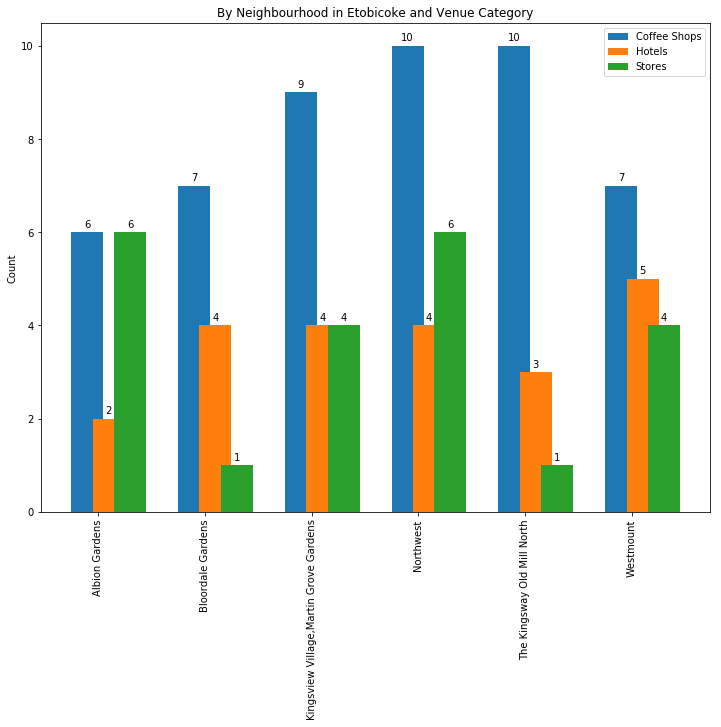

In [158]:
# let's plot on a semi decent bar chart these 5 neighbourhoods with a bar for each coffee shop / drugstore / hotel in horizontal access

fig= plt.figure(figsize=(6,5))

#HERE LIST the nbhds in ETOBICOKE in the labels_eb
labels_eb = ["Albion Gardens", "Bloordale Gardens", "Kingsview Village,Martin Grove Gardens", "Northwest", "The Kingsway Old Mill North", "Westmount"]
#FROM THE DATA ABOVE LIST THE NUMBERS IN THE BELOW
#note INCLUDED PHARMACY AND CONVENIENCE STORES UNDER stores
CoffeeShops = [6, 7, 9, 10, 10, 7]
Hotels = [2, 4, 4, 4, 3, 5]
Stores = [6, 1, 4, 6, 1, 4]

x = np.arange(len(labels_eb))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()

rects4 = ax.bar(x - width/3, CoffeeShops, width, label='Coffee Shops')
rects5 = ax.bar(x + width/3, Hotels, width, label='Hotels')
rects6 = ax.bar(x + width, Stores, width, label='Stores')


# Adding labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('By Neighbourhood in Etobicoke and Venue Category')
ax.set_xticks(x)
ax.set_xticklabels(labels_eb)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
        
        
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)



plt.show()

In [159]:
address = '140 La Rose Ave, Etobicoke, ON'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6855107 -79.5241184


# Hours of operation for Martin Gove, Northwest, Westmount and the Kingsway coffee shops in above neighbourhoods

In [406]:
#re entering the client id and secret to pull coffee shops hours.
CLIENT_ID = 'VEQIS1TMJHA0BKFAYVXZ2D3XYY4UANYS0DBXXZG3TVKMZ5IK' # my Foursquare ID
CLIENT_SECRET = 'AGBKK0CU0IYRWYWXIBLKPPPNJRWUDKHAMPTLYWSZZURMHMXW' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 5
#urltest = "https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}".format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
#urltest

#checking Starbucks in Kingsway
tipss='https://api.foursquare.com/v2/venues/55fd4770498e7a8fbc9082fe/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tipss=requests.get(url=tipss, params=params)

data_tipss=json.loads(resp_tipss.text)

data_tipss

{'meta': {'code': 200, 'requestId': '5e0b85eb0be7b4001b615392'},
 'response': {'hours': {'timeframes': [{'days': [1, 2, 3, 4, 5, 6],
     'includesToday': True,
     'open': [{'start': '0600', 'end': '2200'}],
     'segments': []},
    {'days': [7],
     'open': [{'start': '0600', 'end': '2130'}],
     'segments': []}]},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '0900', 'end': '1100'},
      {'start': '1400', 'end': '2000'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '0800', 'end': '1000'},
      {'start': '1200', 'end': '1900'}],
     'segments': []},
    {'days': [4],
     'open': [{'start': '0800', 'end': '1200'},
      {'start': '1400', 'end': '1900'},
      {'start': '2100', 'end': '2200'}],
     'segments': []},
    {'days': [5, 6, 7],
     'open': [{'start': '0800', 'end': '1900'}],
     'segments': []},
    {'days': [1],
     'open': [{'start': '0800', 'end': '1000'},
      {'start': '1400', 'end': '1900

In [123]:
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print("done")

done


In [405]:
#checking Tims in Northwest
tips='https://api.foursquare.com/v2/venues/4e149e06aeb7727f2103e1b6/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tips=requests.get(url=tips1, params=params)

data_tips=json.loads(resp_tips.text)

data_tips


{'meta': {'code': 200, 'requestId': '5e0b85b2fb34b5001b9afa38'},
 'response': {'hours': {'timeframes': [{'days': [1, 2, 4, 5],
     'includesToday': True,
     'open': [{'start': '0830', 'end': '2100'}],
     'segments': []},
    {'days': [6], 'open': [{'start': '0830', 'end': '1800'}], 'segments': []},
    {'days': [7],
     'open': [{'start': '1000', 'end': '1800'}],
     'segments': []}]},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '1000', 'end': '2100'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '1000', 'end': '1700'},
      {'start': '2000', 'end': '2100'}],
     'segments': []},
    {'days': [4], 'open': [{'start': '1000', 'end': '1800'}], 'segments': []},
    {'days': [5], 'open': [{'start': '0900', 'end': '2100'}], 'segments': []},
    {'days': [6, 7],
     'open': [{'start': '1000', 'end': '1800'}],
     'segments': []},
    {'days': [1],
     'open': [{'start': '1100', 'end': '1600'},
      {'start': '

In [160]:
#checking Westmount coffeeshop
tipswm='https://api.foursquare.com/v2/venues/4b96d5f7f964a520cee734e3/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tipswm=requests.get(url=tipswm, params=params)

data_tipswm=json.loads(resp_tipswm.text)

data_tipswm



{'meta': {'code': 200, 'requestId': '5e0bc027006dce001ba5dc02'},
 'response': {'hours': {},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '0700', 'end': '1000'},
      {'start': '1300', 'end': '1700'},
      {'start': '1900', 'end': '2300'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '0700', 'end': '1400'},
      {'start': '2100', 'end': '2200'}],
     'segments': []},
    {'days': [4],
     'open': [{'start': '0700', 'end': '2000'},
      {'start': '2200', 'end': '2300'}],
     'segments': []},
    {'days': [5], 'open': [{'start': '0800', 'end': '2100'}], 'segments': []},
    {'days': [6], 'open': [{'start': '1000', 'end': '+0000'}], 'segments': []},
    {'days': [7],
     'open': [{'start': '1200', 'end': '1700'},
      {'start': '1900', 'end': '2300'}],
     'segments': []},
    {'days': [1],
     'open': [{'start': '0700', 'end': '1000'},
      {'start': '1300', 'end': '1900'},
      {'start': '2100', 'end': '23

In [171]:
#checking Second Cup in Kingsview
tips1='https://api.foursquare.com/v2/venues/4b9e7182f964a5204be436e3/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tips1=requests.get(url=tips1, params=params)

data_tips1=json.loads(resp_tips1.text)

data_tips1


{'meta': {'code': 200, 'requestId': '5e0bc4283907e7001bf2b4fb'},
 'response': {'hours': {'timeframes': [{'days': [1, 2, 4, 5],
     'includesToday': True,
     'open': [{'start': '0830', 'end': '2100'}],
     'segments': []},
    {'days': [6], 'open': [{'start': '0830', 'end': '1800'}], 'segments': []},
    {'days': [7],
     'open': [{'start': '1000', 'end': '1800'}],
     'segments': []}]},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '1000', 'end': '2100'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '1000', 'end': '1700'},
      {'start': '2000', 'end': '2100'}],
     'segments': []},
    {'days': [4], 'open': [{'start': '1000', 'end': '1800'}], 'segments': []},
    {'days': [5], 'open': [{'start': '0900', 'end': '2100'}], 'segments': []},
    {'days': [6, 7],
     'open': [{'start': '1000', 'end': '1800'}],
     'segments': []},
    {'days': [1],
     'open': [{'start': '1100', 'end': '1600'},
      {'start': '

## Etobicoke neighbourhood checked coffee shops open from 6am until at least 9pm

# Checking Hours of operation of coffee shops in Scarborough neighbourhoods: Clarks, Scarborough village(SV) and Woburn. Although only Clarks offers more than one option of each

In [172]:
#checking Starbucks in Scarborough's Clarks
tips2='https://api.foursquare.com/v2/venues/4ad8bf7df964a5204c1421e3/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tips2=requests.get(url=tips2, params=params)

data_tips2=json.loads(resp_tips2.text)

data_tips2

{'meta': {'code': 200, 'requestId': '5e0bc468c8cff2001b96f61b'},
 'response': {'hours': {'timeframes': [{'days': [1, 2, 3, 4, 5],
     'includesToday': True,
     'open': [{'start': '0600', 'end': '2200'}],
     'segments': []},
    {'days': [6, 7],
     'open': [{'start': '0630', 'end': '2200'}],
     'segments': []}]},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '0600', 'end': '1000'},
      {'start': '1200', 'end': '1500'},
      {'start': '1800', 'end': '1900'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '0600', 'end': '1000'},
      {'start': '1200', 'end': '1500'},
      {'start': '1700', 'end': '2000'}],
     'segments': []},
    {'days': [4],
     'open': [{'start': '0600', 'end': '1000'},
      {'start': '1200', 'end': '1500'},
      {'start': '1800', 'end': '1900'}],
     'segments': []},
    {'days': [5],
     'open': [{'start': '0600', 'end': '1000'},
      {'start': '1200', 'end': '1800'}],
     'segm

In [173]:
#checking Tims in Scarborough's Clark

tips3='https://api.foursquare.com/v2/venues/4ad8c5dbf964a520821421e3/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tips3=requests.get(url=tips3, params=params)

data_tips3=json.loads(resp_tips3.text)

data_tips3

{'meta': {'code': 200, 'requestId': '5e0bc45471c42800208cf251'},
 'response': {'hours': {'timeframes': [{'days': [1, 2, 3, 4, 5, 6, 7],
     'includesToday': True,
     'open': [{'start': '0000', 'end': '+0000'}],
     'segments': []}]},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '0600', 'end': '1600'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '0600', 'end': '1000'},
      {'start': '1200', 'end': '1900'}],
     'segments': []},
    {'days': [4],
     'open': [{'start': '0600', 'end': '0900'},
      {'start': '1200', 'end': '1600'},
      {'start': '1800', 'end': '1900'}],
     'segments': []},
    {'days': [5], 'open': [{'start': '0700', 'end': '1800'}], 'segments': []},
    {'days': [6, 7],
     'open': [{'start': '0900', 'end': '1200'}],
     'segments': []},
    {'days': [1],
     'open': [{'start': '0600', 'end': '1900'}],
     'segments': []}]}}}

# Scarborough Clarks' corner coffee shop open 24hr!!

## from our data so far seems the coffee shops in Scarborough are open later than Etobicoke, so let's have a look at some more coffee shops in Etobicoke's neighbourhood to see if we can match the hours in coffee shops in Scarborough's hoods.

In [177]:
#checking another hour for Etobicoke coffee shop - Java Joe's in Northwest 

tips1='https://api.foursquare.com/v2/venues/4bfd53764cf820a13849ecf4/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tips1=requests.get(url=tips1, params=params)

data_tips1=json.loads(resp_tips1.text)

data_tips1

{'meta': {'code': 200, 'requestId': '5e0bc5280de0d9001bc2220a'},
 'response': {'hours': {},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '0600', 'end': '1700'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '0800', 'end': '1500'},
      {'start': '1800', 'end': '2100'}],
     'segments': []},
    {'days': [4],
     'open': [{'start': '0800', 'end': '1500'},
      {'start': '1700', 'end': '1800'}],
     'segments': []},
    {'days': [5],
     'open': [{'start': '0700', 'end': '1000'},
      {'start': '1200', 'end': '1300'},
      {'start': '1800', 'end': '2000'}],
     'segments': []},
    {'days': [6], 'open': [{'start': '0900', 'end': '1700'}], 'segments': []},
    {'days': [7], 'open': [{'start': '0900', 'end': '1900'}], 'segments': []},
    {'days': [1],
     'open': [{'start': '0800', 'end': '1200'},
      {'start': '1500', 'end': '1600'},
      {'start': '2000', 'end': '2200'}],
     'segments': []}]}}}

In [178]:
tips5='https://api.foursquare.com/v2/venues/4c483d0b96abd13adf877301/hours'

params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)

resp_tips5=requests.get(url=tips5, params=params)

data_tips5=json.loads(resp_tips5.text)

data_tips5


{'meta': {'code': 200, 'requestId': '5e0bc47f660a9f001b4e3c8f'},
 'response': {'hours': {'timeframes': [{'days': [1, 2, 3, 4, 5, 6, 7],
     'includesToday': True,
     'open': [{'start': '0000', 'end': '+0000'}],
     'segments': []}]},
  'popular': {'timeframes': [{'days': [2],
     'includesToday': True,
     'open': [{'start': '0600', 'end': '1000'},
      {'start': '1200', 'end': '1300'},
      {'start': '1600', 'end': '2100'}],
     'segments': []},
    {'days': [3],
     'open': [{'start': '0700', 'end': '1100'},
      {'start': '1500', 'end': '1600'},
      {'start': '1800', 'end': '1900'}],
     'segments': []},
    {'days': [4],
     'open': [{'start': '0700', 'end': '1300'},
      {'start': '1500', 'end': '1600'},
      {'start': '1800', 'end': '1900'}],
     'segments': []},
    {'days': [5],
     'open': [{'start': '0600', 'end': '1100'},
      {'start': '1400', 'end': '1900'},
      {'start': '2200', 'end': '2300'}],
     'segments': []},
    {'days': [6], 'open': [{'star

# Tims in Northwest, Etobicoke is open 24hours!!

# Final Round -comparing hotels
## Comparing hotels in Northwest, Etobicoke and Clarks Corners, Scarborough

In [182]:
array = ['Hotel']
jacks_eb_hotelvenues=etobicoke_venues.loc[etobicoke_venues['Venue Category'].isin(array)]
array1 = ['Northwest']
jacks_northwest_hotel=jacks_eb_hotelvenues.loc[jacks_eb_hotelvenues['Neighbourhood'].isin(array1)]
jacks_northwest_hotel

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
926,Northwest,43.706748,-79.594054,Hilton Garden Inn,43.689901,-79.606460,Hotel,4b583fbdf964a5208d4f28e3
928,Northwest,43.706748,-79.594054,Alt Hotel Toronto Airport,43.689702,-79.614669,Hotel,4e295cc02271752a459d81e1
938,Northwest,43.706748,-79.594054,DoubleTree by Hilton Toronto Airport,43.686136,-79.596332,Hotel,59b8bfaaa6fe4d1e9176c881
940,Northwest,43.706748,-79.594054,Residence Inn Toronto Airport,43.690119,-79.587930,Hotel,4bc87951dc55eee11d7ce8ac
946,Northwest,43.706748,-79.594054,Delta Hotels by Marriott Toronto Airport & Con...,43.688993,-79.577907,Hotel,593901b1f62e090a8ea20add
953,Northwest,43.706748,-79.594054,Fairfield Inn & Suites Toronto Airport,43.689495,-79.607070,Hotel,4b80425cf964a520c36130e3
958,Northwest,43.706748,-79.594054,Sandman Signature Hotel Toronto Airport,43.689918,-79.590427,Hotel,4b7beea6f964a5206f742fe3
973,Northwest,43.706748,-79.594054,Hampton Inn & Suites by Hilton Toronto Airport,43.688982,-79.607795,Hotel,4bd09bf81f89ce7234bb67ea
998,Northwest,43.706748,-79.594054,The Westin Toronto Airport,43.687286,-79.598436,Hotel,4ad4c05cf964a520c5f520e3
1005,Northwest,43.706748,-79.594054,Courtyard Toronto Airport,43.684947,-79.594263,Hotel,4bbd48668ec3d13a82f91b28


In [183]:
array = ['Hotel']
jacks_sb_hotelvenues=scarborough_venues.loc[scarborough_venues['Venue Category'].isin(array)]
array1 = ["Clarks Corners,Sullivan,Tam O'Shanter"]
jacks_clarks_hotel=jacks_sb_hotelvenues.loc[jacks_sb_hotelvenues['Neighbourhood'].isin(array1)]
jacks_clarks_hotel

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue_ID
1222,"Clarks Corners,Sullivan,Tam O'Shanter",43.781638,-79.304302,Edward Village,43.770737,-79.336267,Hotel,57644f0a498e2b872da7cf35
1231,"Clarks Corners,Sullivan,Tam O'Shanter",43.781638,-79.304302,Delta Hotels by Marriott Toronto East,43.777070,-79.282822,Hotel,4ad4c05cf964a520c6f520e3


## Conclusion: Northwest hotels in Etobicoke range in price between approx 122 cad and approx 135 cad. Whereas prices of hotels in Clarks' Scarborough range between 104cad and 135cad. Although the range is wider in Clarks', Scarborough - Jack's customers will have 13 more options in hotels in Northwest than in Clarks. 